In [1]:
import pandas as pd

# Carga de datos y data cleaning
Se cargan los datos y se comprueba que el tipo de separador sea el utilizado por defecto (',').

In [2]:
df = pd.read_csv('data_desafio_seguros')
df.head()

,row_id,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,237,A12,21,A32,A49,2767,A62,A75,4,A91,...,A123,61,A141,A151,2,A172,1,A191,A201,2


Se consulta el tamaño del dataset.

In [3]:
df.shape 

(900, 22)

Se obtiene que el tamaño del dataset es de 900 filas x 22 columnas. Sin embargo, la columna 'row_id' es candidata a ser utilizada como índice de filas. 

In [4]:
a = pd.unique(df['row_id'])
a.size

900

In [5]:
a.sort()
print (a)

[  0   1   2   4   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  22  23  24  25  27  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  88  90  91  92  93  94  96  97  98  99 100
 102 103 104 106 107 108 109 110 111 112 113 114 115 116 117 118 119 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 157 158 159 160
 161 162 163 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 191 192 193 194 195 196 197 198
 199 200 201 202 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 222 223 224 225 226 227 229 230 231 233 236 237 238 239 240 241 242
 243 244 245 247 248 249 251 252 253 254 255 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 27

Se observa que 'row_id' no tiene valores consecutivos del 1 al 900 (faltan algunos valores como 3, 5, 17, etc.) por lo que se utiliza el índice actual de las filas. Además, se cambia el índice de las columnas para que no se preste a confusión el número de atributo, que debe ser del 1 al 21.

In [6]:
col= [i for i in range(1,22)]
col.insert(0, 'row_id')
df.columns = col
df = df.rename(columns = {21:'y'})
df.head(10)

,row_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,237,A12,21,A32,A49,2767,A62,A75,4,A91,...,A123,61,A141,A151,2,A172,1,A191,A201,2
5,549,A14,48,A34,A41,8858,A65,A74,2,A93,...,A124,35,A143,A153,2,A173,1,A192,A201,1
6,287,A12,48,A33,A410,7582,A62,A71,2,A93,...,A124,31,A143,A153,1,A174,1,A192,A201,1
7,714,A12,60,A32,A40,14027,A61,A74,4,A93,...,A124,27,A143,A152,1,A174,1,A192,A201,2
8,799,A12,9,A32,A40,1549,A65,A72,4,A93,...,A121,35,A143,A152,1,A171,1,A191,A201,1
9,888,A14,36,A34,A40,6614,A61,A75,4,A93,...,A123,34,A143,A152,2,A174,1,A192,A201,1


##### A continuación de revisará que los valores de cada columna sean válidos. Para ello, por ejemplo, si el atributo 1 se define como A11, A12, A13 o A14, entonces no puede presentar otro valor diferente a estos.

In [7]:
df['row_id'].nunique()

900

Los valores de la columna 'row_id' son únicos. **OK**.

In [8]:
df[1].unique()

array(['A12', 'A14', 'A13', 'A11'], dtype=object)

**Atributo 1**: Todos los valores de la columna 1 pertenecen al dominio del atributo. **OK**.

In [9]:
df[2].unique()

array([30, 36, 12, 21, 48, 60,  9, 18, 10,  6, 24, 16, 15, 45,  8, 13,  4,
       11, 14, 42,  7, 39, 47, 20, 28, 27, 22, 33, 26, 54, 40, 72],
      dtype=int64)

**Atributo 2**: Se presentan valores que tienen sentido (no se presentan números negativos). **OK**.

In [10]:
df[3].unique()

array(['A34', 'A32', 'A31', 'A33', 'A30'], dtype=object)

**Atributo 3**: Se presentan valores que tienen sentido (no se presentan números negativos). **OK**.

In [11]:
df[4].unique()

array(['A40', 'A43', 'A41', 'A49', 'A410', 'A42', 'A44', 'A46', 'A45',
       'A48'], dtype=object)

In [12]:
len(df[df[4]=='A410'])

11

**Atributo 4**: Se presentan **11** valores **A410**, que no pertenecen al dominio del **atributo 4**. Esto podría deberse a un error de tipeo, por lo cual no es posible atribuir estos datos a alguna de las clasificaciones (podría ser A41 o A40), entonces serán eliminados (corresponden al 1.2% de los datos totales).

In [13]:
len(df[df[5]< 0])

0

**Atributo 5**: Se presentan valores que tienen sentido (no se presentan números negativos). **OK**.

In [14]:
df[6].unique()

array(['A61', 'A65', 'A62', 'A63', 'A64'], dtype=object)

**Atributo 6**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [15]:
df[7].unique()

array(['A71', 'A75', 'A72', 'A74', 'A73'], dtype=object)

**Atributo 7**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [16]:
df[8].unique()

array([4, 2, 3, 1], dtype=int64)

**Atributo 8**: Se presentan valores que tienen sentido. **OK**.

In [17]:
df[9].unique()

array(['A94', 'A92', 'A93', 'A91'], dtype=object)

**Atributo 9**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [18]:
df[10].unique()

array(['A101', 'A103', 'A102'], dtype=object)

**Atributo 10**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [19]:
df[11].unique()

array([2, 4, 1, 3], dtype=int64)

**Atributo 11**: Se presentan valores que tienen sentido. **OK**.

In [20]:
df[12].unique()

array(['A123', 'A121', 'A122', 'A124'], dtype=object)

**Atributo 12**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [21]:
df[13].unique()

array([28, 45, 44, 26, 61, 35, 31, 27, 34, 22, 23, 24, 25, 36, 33, 29, 58,
       43, 30, 49, 41, 56, 51, 67, 42, 32, 52, 47, 21, 46, 20, 39, 66, 57,
       54, 37, 40, 50, 64, 53, 48, 55, 38, 74, 19, 59, 63, 75, 65, 60, 62,
       68, 70], dtype=int64)

**Atributo 13**: Se presentan valores que tienen sentido. **OK**.

In [22]:
df[14].unique()

array(['A143', 'A141', 'A142'], dtype=object)

**Atributo 14**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [23]:
df[15].unique()

array(['A152', 'A151', 'A153'], dtype=object)

**Atributo 15**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [24]:
df[16].unique()

array([2, 1, 4, 3], dtype=int64)

**Atributo 16**: Se presentan valores que tienen coherencia. **OK**.

In [25]:
df[17].unique()

array(['A174', 'A172', 'A173', 'A171'], dtype=object)

**Atributo 17**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [26]:
df[18].unique()

array([1, 2], dtype=int64)

**Atributo 18**: Se presentan valores que tienen coherencia. **OK**.

In [27]:
df[19].unique()

array(['A191', 'A192'], dtype=object)

**Atributo 19**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [28]:
df[20].unique()

array(['A201', 'A202'], dtype=object)

**Atributo 20**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

In [29]:
df['y'].unique()

array([2, 1], dtype=int64)

**Atributo 21**: Se presentan valores que pertenecen al dominio del atributo. **OK**.

####  Se eliminarán los datos no consistentes del atributo 4.

In [30]:
df.loc[df[4] == 'A410']

,row_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y
6,287,A12,48,A33,A410,7582,A62,A71,2,A93,...,A124,31,A143,A153,1,A174,1,A192,A201,1
25,83,A11,24,A32,A410,1755,A61,A75,4,A92,...,A121,58,A143,A152,1,A172,1,A192,A201,1
50,431,A12,24,A32,A410,11328,A61,A73,2,A93,...,A123,29,A141,A152,2,A174,1,A192,A201,2
208,442,A12,20,A33,A410,2629,A61,A73,2,A93,...,A123,29,A141,A152,2,A173,1,A192,A201,1
273,818,A11,36,A32,A410,15857,A61,A71,2,A91,...,A123,43,A143,A152,1,A174,1,A191,A201,1
287,594,A11,24,A31,A410,1358,A65,A75,4,A93,...,A123,40,A142,A152,1,A174,1,A192,A201,2
358,310,A12,48,A32,A410,5381,A65,A71,3,A93,...,A124,40,A141,A153,1,A171,1,A192,A201,1
593,915,A12,48,A30,A410,18424,A61,A73,1,A92,...,A122,32,A141,A152,1,A174,1,A192,A202,2
659,665,A14,24,A34,A410,6314,A61,A71,4,A93,...,A124,27,A141,A152,2,A174,1,A192,A201,1
768,72,A11,8,A34,A410,1164,A61,A75,3,A93,...,A124,51,A141,A153,2,A174,2,A192,A201,1


In [31]:
df_new = df.loc[df[4] != 'A410']

In [32]:
df.shape[0] - df_new.shape[0]

11

In [33]:
df_new.head(3)

,row_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,A191,A201,1


### Tratamiento de variables categóricas

In [34]:
df1 = df_new.copy()
df1.shape

(889, 22)

In [35]:
df1.head()

,row_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,237,A12,21,A32,A49,2767,A62,A75,4,A91,...,A123,61,A141,A151,2,A172,1,A191,A201,2


In [36]:
df1[19] = df1[19].replace({"A192": 1, "A191": 0})
df1[20] = df1[20].replace({"A201": 1, "A202": 0})
df1['y'] = df1['y'].replace({2: 0})

In [37]:
dummy_ccvalue = pd.get_dummies(df1[1], prefix = 'SaldoCC').iloc[:,1:]
dummy_histCred = pd.get_dummies(df1[3], prefix = 'HistCrediticia').iloc[:,1:]
dummy_prop = pd.get_dummies(df1[4], prefix = 'Propósito').iloc[:,1:]
dummy_ahorro = pd.get_dummies(df1[6], prefix = 'Ahorro').iloc[:,1:]
dummy_alab = pd.get_dummies(df1[7], prefix = 'AntLaboral').iloc[:,1:]
dummy_ests = pd.get_dummies(df1[9], prefix = 'EstCivilSexo').iloc[:,1:]
dummy_deudor = pd.get_dummies(df1[10], prefix = 'Garantes').iloc[:,1:]
dummy_pos = pd.get_dummies(df1[12], prefix = 'Posesiones').iloc[:,1:]
dummy_opagos = pd.get_dummies(df1[14], prefix = 'OtrosPagos').iloc[:,1:]
dummy_vivienda = pd.get_dummies(df1[15], prefix = 'Vivienda').iloc[:,1:]
dummy_tipotrab = pd.get_dummies(df1[17], prefix = 'TipoTrabajo').iloc[:,1:]

In [38]:
df1.head(4)

,row_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,0,1,0
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,1,1,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,0,1,1
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,A121,26,A143,A152,1,A171,1,0,1,0


In [39]:
df_dummies = pd.concat([dummy_ccvalue, dummy_histCred, dummy_prop, dummy_ahorro, dummy_alab, dummy_ests,
                dummy_deudor, dummy_pos, dummy_opagos, dummy_vivienda, dummy_tipotrab,
                ], axis=1)

In [40]:
df_dummies.shape

(889, 38)

In [41]:
df_dummies.head()

,SaldoCC_A12,SaldoCC_A13,SaldoCC_A14,HistCrediticia_A31,HistCrediticia_A32,HistCrediticia_A33,HistCrediticia_A34,Propósito_A41,Propósito_A42,Propósito_A43,...,Posesiones_A122,Posesiones_A123,Posesiones_A124,OtrosPagos_A142,OtrosPagos_A143,Vivienda_A152,Vivienda_A153,TipoTrabajo_A172,TipoTrabajo_A173,TipoTrabajo_A174
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
2,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
data = df1.join(df_dummies)
data.head()

,row_id,1,2,3,4,5,6,7,8,9,...,Posesiones_A122,Posesiones_A123,Posesiones_A124,OtrosPagos_A142,OtrosPagos_A143,Vivienda_A152,Vivienda_A153,TipoTrabajo_A172,TipoTrabajo_A173,TipoTrabajo_A174
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,0,1,0,0,1,1,0,0,0,1
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,0,0,0,0,1,1,0,1,0,0
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,1,0,0,0,1,1,0,0,1,0
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,0,0,0,0,1,1,0,0,0,0
4,237,A12,21,A32,A49,2767,A62,A75,4,A91,...,0,1,0,0,0,0,0,1,0,0


In [43]:
data = data.drop([1,3,4,6,7,9,10,12,14,15,17], axis = 1)
data.columns.values.tolist()

['row_id',
 2,
 5,
 8,
 11,
 13,
 16,
 18,
 19,
 20,
 'y',
 'SaldoCC_A12',
 'SaldoCC_A13',
 'SaldoCC_A14',
 'HistCrediticia_A31',
 'HistCrediticia_A32',
 'HistCrediticia_A33',
 'HistCrediticia_A34',
 'Propósito_A41',
 'Propósito_A42',
 'Propósito_A43',
 'Propósito_A44',
 'Propósito_A45',
 'Propósito_A46',
 'Propósito_A48',
 'Propósito_A49',
 'Ahorro_A62',
 'Ahorro_A63',
 'Ahorro_A64',
 'Ahorro_A65',
 'AntLaboral_A72',
 'AntLaboral_A73',
 'AntLaboral_A74',
 'AntLaboral_A75',
 'EstCivilSexo_A92',
 'EstCivilSexo_A93',
 'EstCivilSexo_A94',
 'Garantes_A102',
 'Garantes_A103',
 'Posesiones_A122',
 'Posesiones_A123',
 'Posesiones_A124',
 'OtrosPagos_A142',
 'OtrosPagos_A143',
 'Vivienda_A152',
 'Vivienda_A153',
 'TipoTrabajo_A172',
 'TipoTrabajo_A173',
 'TipoTrabajo_A174']

In [44]:
data.shape

(889, 49)

### Interpretación de las columnas del dataframe actual (df_copy)

In [45]:
data.columns.values

array(['row_id', 2, 5, 8, 11, 13, 16, 18, 19, 20, 'y', 'SaldoCC_A12',
       'SaldoCC_A13', 'SaldoCC_A14', 'HistCrediticia_A31',
       'HistCrediticia_A32', 'HistCrediticia_A33', 'HistCrediticia_A34',
       'Propósito_A41', 'Propósito_A42', 'Propósito_A43', 'Propósito_A44',
       'Propósito_A45', 'Propósito_A46', 'Propósito_A48', 'Propósito_A49',
       'Ahorro_A62', 'Ahorro_A63', 'Ahorro_A64', 'Ahorro_A65',
       'AntLaboral_A72', 'AntLaboral_A73', 'AntLaboral_A74',
       'AntLaboral_A75', 'EstCivilSexo_A92', 'EstCivilSexo_A93',
       'EstCivilSexo_A94', 'Garantes_A102', 'Garantes_A103',
       'Posesiones_A122', 'Posesiones_A123', 'Posesiones_A124',
       'OtrosPagos_A142', 'OtrosPagos_A143', 'Vivienda_A152',
       'Vivienda_A153', 'TipoTrabajo_A172', 'TipoTrabajo_A173',
       'TipoTrabajo_A174'], dtype=object)

* row_id = identificador de cliente
* 2 = Duración en meses
* 5 = Monto del crédito en moneda local
* 8 = Tasa a plazo en % de la renta disponible
* 11 = Tiempo desde el cual tienen residencia
* 13 = Edad en años
* 16 = Número de créditos existentes en este banco
* 18 = Número de personas que debe mantener
* $19 = \left\{ \begin{array}{lcc}
             1 &   si\ tiene\  teléfono \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
 
 
* $20 = \left\{ \begin{array}{lcc}
             1 &   si\ es\  extranjero \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $'y' =  \left\{ \begin{array}{lcc}
             1 &   si\ está\  clasificado\ como\ bueno. \\
             \\ 0 &  si\ no. \\
             \end{array}
   \right.$
   
   **Esta será la variable a predecir 'y'.**
   
   
   
* $SaldoCC\_A12 = \left\{ \begin{array}{lcc}
             1 &   si\ saldo\  en\ cuenta\ corriente\ está\ entre\ 0\ y\ 200. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $SaldoCC\_A13 = \left\{ \begin{array}{lcc}
             1 &   si\ saldo\  en\ cuenta\ corriente\ es\ mayor\ a\ 200. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$

     
* $SaldoCC\_A14 = \left\{ \begin{array}{lcc}
             1 &   si\ no\  tiene\ cuenta\ corriente. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
 
 Si A12, A13 y A14 = 0, entonces el saldo en cuenta corriente es menor a 0.



* $HistCrediticia\_A31 = \left\{ \begin{array}{lcc}
             1 &   si\ todos\  los\ créditos\ de\ este\ banco\ han\ sido\ pagados\ debidamente. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $HistCrediticia\_A32 = \left\{ \begin{array}{lcc}
             1 &   si\ los\ créditos\ existentes\ han\ sido\ pagados\ hasta\ ahora. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$

     
* $HistCrediticia\_A33 = \left\{ \begin{array}{lcc}
             1 &   si ha\ habido\ retrasos\ en\ los\ créditos\ pagados\ en\ el\ pasado. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $HistCrediticia\_A34 = \left\{ \begin{array}{lcc}
             1 &   si\ tiene\ cuenta\ crítica\ u\ otros\ créditos\ en\ otros\ bancos. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
  Si A31, A32, A33 y A34 = 0, entonces el cliente no ha tomado créditos o todos han sido devueltos debidamente.

* $Propósito\_A41 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ un\ auto\ usado. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $Propósito\_A42 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ muebles\ o\ equipamiento. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$

     
* $Propósito\_A43 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ radio\ o\ televisión. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Propósito\_A44 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ artefactos\ domésticos. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Propósito\_A45 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ reparaciones. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Propósito\_A46 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ educación. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   

* $Propósito\_A48 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ re\ - entrenamiento. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Propósito\_A49 = \left\{ \begin{array}{lcc}
             1 &   si\ el\ crédito\ es\ para\ negocios. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
  Si A41, A42, A43, A44, A45, A46, A48 y A49 = 0, entonces el propósito del crédito es un auto nuevo.


* $Ahorro\_A62 = \left\{ \begin{array}{lcc}
             1 &   si\ los\ ahorros\ son\ mayor\ o\ igual\ a\ 100\ y\ menor\ a\ 500. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Ahorro\_A63 = \left\{ \begin{array}{lcc}
             1 &   si\ los\ ahorros\ son\ mayor\ o\ igual\ a\ 500\ y\ menor\ a\ 1000. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Ahorro\_A64 = \left\{ \begin{array}{lcc}
             1 &   si\ los\ ahorros\ son\ mayor\ o\ igual\ a\ 1000. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $Ahorro\_A65 = \left\{ \begin{array}{lcc}
             1 &   si\ los\ ahorros\ son\ desconocidos\ o\ sin\ ahorros. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
  Si A62, A63, A64 y A65 = 0, entonces los ahorros son inferiores a 100.


* $AntLaboral\_A72 = \left\{ \begin{array}{lcc}
             1 &   si\ la\ antigüedad\ laboral\ es\ menor\ a\ 1\ año. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $AntLaboral\_A73 = \left\{ \begin{array}{lcc}
             1 &   si\ la\ antigüedad\ laboral\ es\ igual\ o\ mayor\ a\ 1\ año\ y\ menor\ a\ 4\ años. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $AntLaboral\_A74 = \left\{ \begin{array}{lcc}
             1 &   si\ la\ antigüedad\ laboral\ es\ igual\ o\ mayor\ a\ 4\ años\ y\ menor\ a\ 7\ años. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$


* $AntLaboral\_A72 = \left\{ \begin{array}{lcc}
             1 &   si\ la\ antigüedad\ laboral\ es\ igual\ o\ mayor\ a\ 7\ años. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
  Si A72, A73, A74 y A75 = 0, entonces el cliente se encuentra desempleado.



* $EstCivilSexo\_A92 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ mujer\ divorciada, \ separada\ o\ casada. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $EstCivilSexo\_A93 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ hombre\ soltero. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $EstCivilSexo\_A94 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ hombre\ casado\ o\ viudo. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
  
  Si A92, A93 y A94 = 0, entonces el cliente es hombre divorciado o separado.


* $Garantes\_A102 = \left\{ \begin{array}{lcc}
             1 &   si\ tiene\ co\- deudor. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $Garantes\_A103 = \left\{ \begin{array}{lcc}
             1 &   si\ tiene\ aval. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
  
  Si A102 y A103 = 0, entonces el cliente no tiene deudores ni garantes.


* $Posesiones\_A122 = \left\{ \begin{array}{lcc}
             1 &   si\ no\ tiene\ bienes\ raíces\ o\ está\ construyendo\ una\ cuenta\ de\ ahorro\ o\ seguro\ de\ vida. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
* $Posesiones\_A123 = \left\{ \begin{array}{lcc}
             1 &   si\ no\ tiene\ bienes\ raíces\ o\ no\ está\ construyendo\ cuenta\ de\ ahorro\ o\ seguro\ de\ vida\ y\ tiene\ auto\ u\ otro\ (sin\ considerar\ ahorros). \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
  
* $Posesiones\_A124 = \left\{ \begin{array}{lcc}
             1 &   si\ la\ información\ es\ desconocida\ o\ no\ tiene\ propiedades. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
  
  Si A122, A123 y A124 = 0, entonces el cliente sí tiene bien raíz.
  

* $OtrosPagos\_A142 = \left\{ \begin{array}{lcc}
             1 &   si\ tiene\ pagos\ pendientes\ en\ cuotas\ en\ tiendas\ del\ comercio\ en\ general. \\
             \\ 0 &  si\ no \\
             \end{array}          
  \right.$

* $OtrosPagos\_A143 = \left\{ \begin{array}{lcc}
             1 &   si\ no\ tiene\ pagos\ pendientes\ en\ cuotas. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
   Si A142 y A143 = 0, entonces el cliente sí tiene pagos pendientes en cuotas con el Banco.


* $Vivienda\_A152 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ dueño\ de\ vivienda. \\
             \\ 0 &  si\ no \\
             \end{array}          
  \right.$

* $Vivienda\_A152 = \left\{ \begin{array}{lcc}
             1 &   si\ vive\ gratis. \\
             \\ 0 &  si\ no \\
             \end{array}
   \right.$
   
   
   Si A152 y A153 = 0, entonces el cliente arrienda vivienda.
   

* $TipoTrabajo\_A172 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ no\ calificado\ y\ residente. \\
             \\ 0 &  si\ no \\
             \end{array}          
  \right.$

* $TipoTrabajo\_A173 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ calificado\ u\ oficio. \\
             \\ 0 &  si\ no \\
             \end{array}          
  \right.$
   
* $TipoTrabajo\_A174 = \left\{ \begin{array}{lcc}
             1 &   si\ es\ de\ gestión,\ trabajo\ por\ cuenta\ propia,\ empleado o\ funcionario\ altamente\ calificado. \\
             \\ 0 &  si\ no \\
             \end{array}          
  \right.$
   
   
   Si A172, A173 y A174 = 0, entonces el cliente es desempleado o no calificado y no residente.

# Análisis exploratorio

In [46]:
data['y'].value_counts()

1    625
0    264
Name: y, dtype: int64

Esto quiere decir que de los 889 clientes, 70.3% fueron evaluados como "Bueno" y 29.7% como "Malo"

In [47]:
data.groupby('y').mean()

,row_id,2,5,8,11,13,16,18,19,20,...,Posesiones_A122,Posesiones_A123,Posesiones_A124,OtrosPagos_A142,OtrosPagos_A143,Vivienda_A152,Vivienda_A153,TipoTrabajo_A172,TipoTrabajo_A173,TipoTrabajo_A174
y,,,,,,,,,,,,,,,,,,,,,
0,520.837121,24.704545,3777.151515,3.113636,2.829545,33.840909,1.356061,1.136364,0.371212,0.988636,...,0.253788,0.325758,0.215909,0.060606,0.7500,0.628788,0.143939,0.189394,0.636364,0.151515
1,494.436800,19.356800,2983.680000,2.921600,2.851200,36.219200,1.414400,1.153600,0.417600,0.950400,...,0.233600,0.332800,0.120000,0.040000,0.8464,0.747200,0.089600,0.206400,0.640000,0.134400


* En promedio, quienes son dueños de vivienda están clasificados como "buenos" clientes.
* En promedio, quienes no tienen otros pagos pendientes en cuotas están clasificados como "buenos" clientes.
* En promedio, quienes no tienen celular estarían clasificados como mejores clientes ue quienes tienen.
* En promedio, quienes tienen una mayor tasa a plazo ('8') estarían clasificados como "malos" clientes.
* En promedio, quienes tienen monto del crédito más grande, estarían clasificados como "malos" clientes.

In [48]:
import matplotlib. pyplot as plt

In [49]:
%matplotlib inline
pd.crosstab(data['Vivienda_A152'], data['y'])

y,0,1
Vivienda_A152,,
0,98,158
1,166,467


Text(0, 0.5, 'Dueño de vivienda')

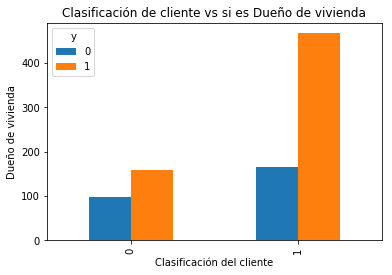

In [50]:
pd.crosstab(data.Vivienda_A152, data.y).plot(kind = 'bar')
plt.title('Clasificación de cliente vs si es Dueño de vivienda')
plt.xlabel('Clasificación del cliente')
plt.ylabel('Dueño de vivienda')

* Indicio de que los dueños de vivienda en general son evaluados en su mayoría como "buenos" clientes.

Text(0, 0.5, 'Dueño de vivienda')

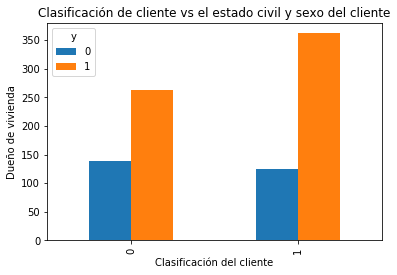

In [51]:
pd.crosstab(data['EstCivilSexo_A93'], data['y'])
pd.crosstab(data.EstCivilSexo_A93, data.y).plot(kind = 'bar')
plt.title('Clasificación de cliente vs el estado civil y sexo del cliente')
plt.xlabel('Clasificación del cliente')
plt.ylabel('Dueño de vivienda')

* Se muestra indicio de que los hombres solteros son más calificados como "buenos" clientes.

Text(0, 0.5, 'Frecuencia cliente con cuenta crítica')

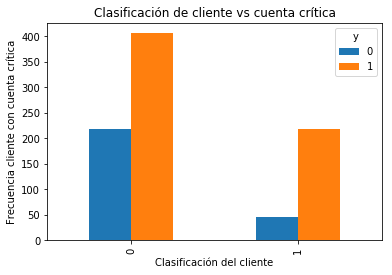

In [52]:
pd.crosstab(data['HistCrediticia_A34'], data['y'])
pd.crosstab(data.HistCrediticia_A34, data.y).plot(kind = 'bar')
plt.title('Clasificación de cliente vs cuenta crítica')
plt.xlabel('Clasificación del cliente')
plt.ylabel('Frecuencia cliente con cuenta crítica')

* Se muestra que quienes tienen cuenta crítica u otros créditos existentes con en su mayoría clasificados como "malos" clientes.

# División del dataset en entrenamiento y testing

In [53]:
data_vars = data.columns.values.tolist()

In [54]:
Y = ['y']
X = [v for v in data_vars if v not in Y and v != 'row_id']

El dataset se divide en 70% datos a utilizar para entrenamiento y 30% datos a utilizar para testing del modelo.

In [55]:
X_train = data[X].head(622)
X_test = data[X].tail(267)
Y_train = data[Y].head(622)
Y_test = data[Y].tail(267)

## Selección de rasgos del modelo

In [56]:
n = 10
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression(solver='newton-cg')

In [58]:
rfe = RFE(lr, n)
rfe = rfe.fit(data[X], data[Y].values.ravel())

In [59]:
rfe.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)>

In [60]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [61]:
rfe.ranking_

array([33, 38, 22, 35, 36, 27, 31, 28,  1,  9,  1,  1, 34,  1,  1,  1,  1,
       11,  4, 10, 17, 26,  1, 18, 19, 14,  1,  3, 37, 30,  8, 20, 29,  7,
       21,  6,  1, 12, 13,  2, 32,  5, 15, 16, 24, 23, 25])

#### Ranking de variables candidatas al modelo
A continuación se muestran las 10 mejores candidatas al modelo, y las que les siguen siguen en este ranking.

In [62]:
ranking_vars = zip(data[X], rfe.support_,rfe.ranking_)
pd.DataFrame(ranking_vars).sort_values([1, 2], ascending=[False, True])

,0,1,2
8,20,True,1
10,SaldoCC_A13,True,1
11,SaldoCC_A14,True,1
13,HistCrediticia_A32,True,1
14,HistCrediticia_A33,True,1
15,HistCrediticia_A34,True,1
16,Propósito_A41,True,1
22,Propósito_A48,True,1
26,Ahorro_A64,True,1
36,Garantes_A103,True,1


## Implementación con statsmodel

In [63]:
import statsmodels.api as sm

In [64]:
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit()

         Current function value: 0.419486
         Iterations: 35


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Este algoritmo utiliza el método de Máxima Verosimilitud, donde se realizan iteraciones para poder encontrar la solución de la función logística. Las variables que tengan valores p < 0,05 (intervalo de confianza del 95%) y cuyo intervalo [0.025     0.975] no incluya al 0, se consideran para el modelo.  Sin embargo, en este caso se indica un error, ya que el modelo de optimización no converge, por tanto se prueba con otra herramienta.

In [65]:
print(result.summary2())

                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.315     
Dependent Variable:       y                      AIC:                    615.8409  
Date:                     2019-06-23 05:25       BIC:                    824.1891  
No. Observations:         622                    Log-Likelihood:         -260.92   
Df Model:                 46                     LL-Null:                -381.14   
Df Residuals:             575                    LLR p-value:            3.8558e-28
Converged:                0.0000                 Scale:                  1.0000    
No. Iterations:           35.0000                                                  
-----------------------------------------------------------------------------------
                    Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------------------
2                  -0.0382 

###  Implementación con herramienta SciKit-learn

In [66]:
from sklearn import linear_model

In [67]:
X_train.head()

,2,5,8,11,13,16,18,19,20,SaldoCC_A12,...,Posesiones_A122,Posesiones_A123,Posesiones_A124,OtrosPagos_A142,OtrosPagos_A143,Vivienda_A152,Vivienda_A153,TipoTrabajo_A172,TipoTrabajo_A173,TipoTrabajo_A174
0,30,4249,4,2,28,2,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,36,3835,2,4,45,1,1,1,1,0,...,0,0,0,0,1,1,0,1,0,0
2,12,1804,3,4,44,1,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
3,12,609,4,1,26,1,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,21,2767,4,2,61,2,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [68]:
Y_train.head()

,y
0,0
1,1
2,1
3,0
4,0


Este código permite emplementar un algoritmo para encontrar la solución de la regresión logística, con el paquete SciKit-Learn. Se muestran algunos parámetros como el solver utilizado.

In [69]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train, Y_train.values.ravel())

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
logit_model.score(X_train,Y_train)

0.8006430868167203

Este valor indica el R^2 del modelo, que tiene un dominio de 0 a 1, siendo 1 un modelo ideal. En este caso el coeficiente es de 0.80, lo que indica que el modelo es aceptable. Dado que la probabilidad de acertar en verdaderos positivos y verdaderos negativos es del 80%.

In [71]:
logit_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

A continuación se presentan los coeficientes del modelo (escalares que multiplican a cada variable predictora). El coeficiente de la variable indica que si la variable aumenta en una unidad, el logaritmo del cuociente de probabilidad aumenta (si el coef >0) en la medida del coeficiente. 

In [72]:
import numpy as np
pd.DataFrame(list(zip(X_train.columns, np.transpose(logit_model.coef_)))).sort_values([1], ascending=[True])

,0,1
12,HistCrediticia_A31,[-0.6147244175728904]
35,Garantes_A102,[-0.5536867850224532]
39,Posesiones_A124,[-0.5435815595290157]
37,Posesiones_A122,[-0.5254510220366116]
21,Propósito_A46,[-0.4792086572227119]
8,20,[-0.46863488996129515]
28,AntLaboral_A72,[-0.21306633120404048]
5,16,[-0.2118285136079067]
2,8,[-0.17687401658771823]
45,TipoTrabajo_A173,[-0.11464477042554673]


Las variables con mayor relevancia son:

* SaldoCC_A14 : No tiene cuenta corriente
* Propósito_A41 : Propósito del crédito es un auto usado
* HistCrediticia_A34: Cuenta crítica / otros créditos existentes en (no en este banco)
* Ahorro_A65: Sin ahorros conocidos
* SaldoCC_A13: Saldo sobre 200 
* HistCrediticia_A31: Todos los créditos de este banco han sido pagados debidamente

## Validación del modelo

Para la validación del modelo se utiliza el sub-dataset de conjunto de testing.

In [73]:
lm = linear_model.LogisticRegression()
lm.fit(X_test, Y_test.values.ravel())

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
lm.coef_

array([[-2.49968638e-02, -1.56555622e-04, -4.46370491e-01,
         4.63944615e-02,  1.08360951e-02, -1.78151068e-01,
        -2.63365197e-01,  2.80526493e-01, -3.45984682e-01,
         3.27091917e-01,  4.02515567e-01,  1.74268833e+00,
         8.08641007e-02,  2.30001838e-01,  5.95920637e-01,
         5.14827070e-01,  6.93360362e-01,  5.68236918e-01,
         6.90616296e-01, -1.91765775e-01, -3.77232520e-01,
        -8.30182849e-02,  1.77235463e-01,  5.26627517e-01,
        -1.63291940e-01, -5.47774678e-01,  7.42773597e-01,
         4.77151639e-01,  9.70299029e-02,  1.85924074e-01,
         3.95458440e-01, -1.25578732e-01,  8.11040774e-02,
         6.47487273e-01, -1.51448545e-01, -7.91069016e-02,
         5.90731560e-01,  1.48432425e-01, -2.47215259e-01,
         6.67920082e-03,  1.51181561e-01,  6.96349680e-01,
         7.18205651e-01,  3.82286128e-01, -2.37765920e-01,
         1.94860634e-01,  2.86936022e-01]])

## Cálculo de probabilidades

La columna 0 indica la probabilidad de acertar y la columna 1 da el valor de salida. Cuando es mayor a un umbral, se trata de un caso de éxito. En este caso, de ser clasificado como "Buen" cliente (bajo riesgo).

In [75]:
probs = lm.predict_proba(X_test)
pd.DataFrame(probs)

,0,1
0,0.036843,0.963157
1,0.490199,0.509801
2,0.123106,0.876894
3,0.375840,0.624160
4,0.169340,0.830660
5,0.219295,0.780705
6,0.347112,0.652888
7,0.525267,0.474733
8,0.367730,0.632270
9,0.150335,0.849665


In [76]:
prediction = lm.predict(X_test)

In [77]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1], dtype=int64)

In [78]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.87
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)

Debido a que es **5 veces peor clasificar un cliente como bueno cuando es malo que malo cuando es bueno**, se utiliza inicialmente un threshold de 1-1/5 = 0.8  .  Esto indica que para que un caso de éxito (cliente bueno) sea calificado como tal, la probabilidad debe ser mayor a 0,8. Además, se realizan iteraciones para que la proporción FP/FN sea 1/5 para amortiguar el efecto de clasificar un cliente bueno cuando es malo.

In [79]:
a = pd.concat([prob_df, Y_train], axis = 1, join = 'inner')
a

,0,prediction,y
0,0.963157,1,0
1,0.509801,0,1
2,0.876894,1,1
3,0.624160,0,0
4,0.830660,0,0
5,0.780705,0,1
7,0.474733,0,0
8,0.632270,0,1
9,0.849665,0,1
10,0.984942,1,1


In [80]:
from sklearn import metrics

In [81]:
metrics.accuracy_score(Y_test, prediction)

0.7940074906367042

El 79,4% de los casos el algoritmo acierta en la clasificación de clientes.

### Validación cruzada estándar

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
scores = cross_val_score(linear_model.LogisticRegression(), data[X], data[Y], scoring='accuracy', cv=12)
scores

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be chan

array([0.84      , 0.71621622, 0.75675676, 0.75675676, 0.77027027,
       0.77027027, 0.71621622, 0.72972973, 0.7972973 , 0.60810811,
       0.74324324, 0.72972973])

In [84]:
scores.mean()

0.7445495495495495

El promedio de las validaciones indica 74,45% de eficacia del modelo.

### Matriz de confusión

In [85]:
confusion_matrix = pd.crosstab(a.prediction, a.y)
confusion_matrix

y,0,1
prediction,,
0,61,117
1,23,62


In [86]:
VN = confusion_matrix[0][0]
VP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [87]:
FP/FN

0.19658119658119658

Es aproximadamente 0.20, dada la condición de FP/FN (Falsos positivos sobre falsos negativos).

In [88]:
Sensibilidad = VP/(VP+FN)
Sensibilidad

0.3463687150837989

In [89]:
Especificidad = VN/(VN+FP)
1-Especificidad

0.27380952380952384

# Cálculo de precio base

###  **Precio_base = 3,09 + 0,3 * Y**

Donde **Y** = score de riesgo. Cuyos coeficientes se encuentran en la siguiente tabla

In [90]:
pd.DataFrame(list(zip(X_train.columns, np.transpose(logit_model.coef_)))).sort_values([1], ascending=[True])

,0,1
12,HistCrediticia_A31,[-0.6147244175728904]
35,Garantes_A102,[-0.5536867850224532]
39,Posesiones_A124,[-0.5435815595290157]
37,Posesiones_A122,[-0.5254510220366116]
21,Propósito_A46,[-0.4792086572227119]
8,20,[-0.46863488996129515]
28,AntLaboral_A72,[-0.21306633120404048]
5,16,[-0.2118285136079067]
2,8,[-0.17687401658771823]
45,TipoTrabajo_A173,[-0.11464477042554673]
